In [1]:
## load python dependencies
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [3]:
### read product review dataset
data=pd.read_csv("D:/Amazon Project/amazonreviews.csv")
data.head(3)

,Unnamed: 0,Customer Name,Date,Ratings,Review Titles,Reviews
0,0,Juhi Kulkarni,26 April 2022,5.0 out of 5 stars,Super cool bottle and very useful,NaN
1,1,Juhi Kulkarni,22 April 2022,5.0 out of 5 stars,"Must have, loved the product",The media could not be loaded.
2,2,Ashwini Ingole,22 February 2022,5.0 out of 5 stars,Love it,"I love this bottle and I use it regularly, es..."


In [26]:
data.dtypes

Unnamed: 0        int64
Customer Name    object
Date             object
Ratings          object
Review Titles    object
Reviews          object
dtype: object

In [58]:
Ratings = ['5.0 out of 5 stars','1.0 out of 5 stars','1.0 out of 5 stars']
data=pd.DataFrame(ratings,columns= ['Ratings'])
data['stars']=pd.to_numeric(data['Ratings'].apply(lambda x:x[:1])).astype(int)

In [59]:
data.head()

,Ratings,stars
0,5.0 out of 5 stars,5
1,1.0 out of 5 stars,1
2,1.0 out of 5 stars,1


In [50]:
data.info

<bound method DataFrame.info of               Ratings  stars
0  5.0 out of 5 stars      5
1  1.0 out of 5 stars      1
2  1.0 out of 5 stars      1>

In [4]:
data.shape
row=data.shape[0]
cols=data.shape[1]
print('dim: ', data.shape)
print("----------------")
print('total rows:', row)
print("----------------")
print('toal columns: ', cols)
print("----------------")
print('columns: \n', data.columns.values)

dim:  (380, 6)
----------------
total rows: 380
----------------
toal columns:  6
----------------
columns: 
 ['Unnamed: 0' 'Customer Name' 'Date' 'Ratings' 'Review Titles' 'Reviews']


In [6]:
## keep the columns that needed for performing sentiment analysis

sent_data = data[['Customer Name', 'Date', 'Ratings','Review Titles','Reviews']]
print('explore filtered review data: \n', sent_data.head())
print("==================================================")
print("explore the descriptive statistics: \n",sent_data.info)
print("==================================================")
print("data description: \n", sent_data.describe())
print("explore the descriptive statistics: \n",sent_data.info)
print("==================================================")
print("dimension info: \n", sent_data.shape)

explore filtered review data: 
     Customer Name              Date             Ratings  \
0  Juhi Kulkarni      26 April 2022  5.0 out of 5 stars   
1  Juhi Kulkarni      22 April 2022  5.0 out of 5 stars   
2  Ashwini Ingole  22 February 2022  5.0 out of 5 stars   
3  Ashwini Ingole     25 April 2022  5.0 out of 5 stars   
4         Pruthvi        3 May 2022  5.0 out of 5 stars   

                          Review Titles  \
0     Super cool bottle and very useful   
1          Must have, loved the product   
2                               Love it   
3  Must trust boldfit for their product   
4                    Best gallon bottle   

                                             Reviews  
0                                                NaN  
1                     The media could not be loaded.  
2   I love this bottle and I use it regularly, es...  
3                                                NaN  
4                     The media could not be loaded.  
explore the descriptive 

In [7]:
### sanity check
print("tot null values in dataset: \n", sent_data.isnull().sum())
print("========================================================")
print("tot na entries in dataset: \n", sent_data.isna().sum())
print("========================================================")

tot null values in dataset: 
 Customer Name      0
Date               0
Ratings            0
Review Titles      0
Reviews          114
dtype: int64
tot na entries in dataset: 
 Customer Name      0
Date               0
Ratings            0
Review Titles      0
Reviews          114
dtype: int64


review rating statistics: 
 1.0 out of 5 stars     38
5.0 out of 5 stars    228
Name: Ratings, dtype: int64


<AxesSubplot:ylabel='Ratings'>

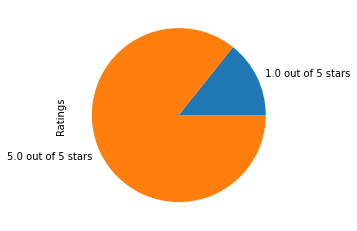

In [8]:
### handly exploratory analysis on product review data
sent_data=sent_data.dropna(how="any")
rev_stats = sent_data['Ratings'].value_counts().sort_values()
print("review rating statistics: \n", rev_stats)
print("==================================================")
sent_data['Ratings'].value_counts().sort_values().plot.pie()

In [39]:
sent_data = sent_data[sent_data["Ratings"].notnull()]
print("data overview: \n", sent_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 1 to 379
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Name    266 non-null    object
 1   Date             266 non-null    object
 2   Ratings          266 non-null    object
 3   Review Titles    266 non-null    object
 4   Reviews          266 non-null    object
 5   sentiment_label  266 non-null    object
dtypes: object(6)
memory usage: 14.5+ KB
data overview: 
 None


In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
## helper function to determine sentiment for given review text
## to do so, we can use pre-generated positive / negative english words
neg_words=pd.read_csv("D:/Amazon Project/amazonreviews.csv")
pos_words=pd.read_csv("D:/Amazon Project/amazonreviews.csv")
print("negative english words: \n", neg_words.head())
print("=====================================")
print("positive english words: \n", pos_words.head())

negative english words: 
    Unnamed: 0   Customer Name              Date             Ratings  \
0           0  Juhi Kulkarni      26 April 2022  5.0 out of 5 stars   
1           1  Juhi Kulkarni      22 April 2022  5.0 out of 5 stars   
2           2  Ashwini Ingole  22 February 2022  5.0 out of 5 stars   
3           3  Ashwini Ingole     25 April 2022  5.0 out of 5 stars   
4           4         Pruthvi        3 May 2022  5.0 out of 5 stars   

                          Review Titles  \
0     Super cool bottle and very useful   
1          Must have, loved the product   
2                               Love it   
3  Must trust boldfit for their product   
4                    Best gallon bottle   

                                             Reviews  
0                                                NaN  
1                     The media could not be loaded.  
2   I love this bottle and I use it regularly, es...  
3                                                NaN  
4            

In [14]:
# txt=sent_data["reviews.text"][0]
# tokens= word_tokenize(txt)
# print('text,,\n', txt)
# print("=============")
# print("tokens:\n", tokens)
# print("=============")
# tkens=[''.join(x for x in y if x not in string.punctuation) for y in tokens]
# print("curious: \n", tkens)
# print("=============")
# non_stopwords=[x for x in tkens if x not in stopwords.words("english")]
# print("non stopwords: \n", non_stopwords) 

In [15]:
### helper function to decide sentiment factor in given text
def assign_sentiment(sent):
    neg_cnt=0
    pos_cnt=0
    neu_cnt=0
    tokenized_sent=word_tokenize(sent)
    tokenized_words=[''.join(x for x in y if x not in string.punctuation) for y in tokenized_sent]
    non_stopwords=[x for x in tokenized_words if x not in stopwords.words("english")]
    for word in non_stopwords:
        if word in neg_words:
            neg_cnt+=1
        elif word in pos_words:
            pos_cnt+=1
        else:
            neu_cnt+=1
    if pos_cnt>neg_cnt:
        return +1
    elif neg_cnt>pos_cnt:
        return -1
    else:
        return 0

In [37]:
### print out positive, negative, neutral reviews from original product review data
pos_reviews=0
neg_reviews=0
neu_reviews=0
for review in sent_data['Reviews']:
    cnt=assign_sentiment(review)
    if cnt==1:
        pos_reviews+=1
    elif cnt==-1:
        neg_reviews+=1
    else:
        neu_reviews+=1

([<matplotlib.patches.Wedge at 0x212bd23b250>,
 [Text(1.1000000000000003, 1.905255888325765, 'Positive'),
  Text(1.2000000000000004, 2.078460969082653, 'Negative'),
  Text(-1.199999999999999, -2.0784609690826534, 'Neutral')],
 [Text(0.6000000000000001, 1.0392304845413263, ' 0.0%'),
  Text(0.7000000000000002, 1.212435565298214, ' 0.0%'),
  Text(-0.6999999999999995, -1.2124355652982142, '100.0%')])

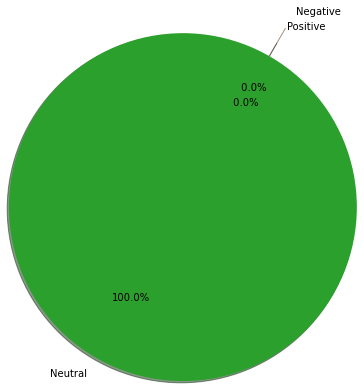

In [20]:
### plot piechart for the sentiment output

plt.pie([pos_reviews, neg_reviews, neu_reviews], labels=["Positive", "Negative", "Neutral"],
       explode=(0, 0.2, 0.2), autopct='%4.1f%%', shadow=True, startangle=60, radius=2)

### Remark
from above plot we can see that porportion of positive, neutral and negative reviews are quite unusal. To get better result, I intend to use feature engineering to train respective machine learning classifier to predict unlabled review data.

<AxesSubplot:ylabel='sentiment_label'>

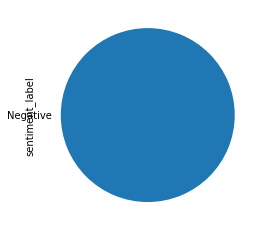

In [38]:
## another way of assigning sentiment label to reviews

def sentiment_labeler(score):
    if (score==5) or (score==4):
        return "Positive"
    elif (score==3):
        return "Neutral"
    else:
        return "Negative"
    
sent_data["sentiment_label"]=sent_data["Ratings"].apply(sentiment_labeler)
print("==========================================================")
sent_data["sentiment_label"].value_counts().sort_values().plot.pie()

In [49]:
### data preparing

from sklearn.model_selection import StratifiedShuffleSplit

split_data=StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for tr_indx, ts_indx in split_data.split(sent_data, sent_data["Ratings"]):
    train_data=sent_data.reindex(tr_indx)
    test_data=sent_data.reindex(ts_indx)

print("====================================")
print("size of splitted train data: \n", train_data.shape)
print("====================================")
print("size of splitted test data: \n", test_data.shape)

size of splitted train data: 
 (212, 6)
size of splitted test data: 
 (54, 6)


In [47]:
## sanity check
tr_data_stats= train_data["Reviews"].value_counts()/len(train_data)

print("sanity check for porportion of diff scale rating: \n", tr_data_stats)

print("=================================================")
ts_data_stats= test_data["Reviews"].value_counts()/len(test_data)

print("sanity check for porportion of diff scale rating in training data: \n", tr_data_stats)

sanity check for porportion of diff scale rating: 
 The media could not be loaded.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      0.292453
 I love this bottle and I use it regularly, especially in summers when more water intake is a must. It looks great and built is sturdy. It’s very easy to carry, doesn’t feel heavy because of the design. Color and matt finish is a bonus. Thank you Boldfit!                                                                                                                                        

### prepare data

In [62]:
X_train=train_data['Reviews']
y_train=train_data["sentiment_label"]
X_test=test_data["Reviews"]
y_test=test_data["sentiment_label"]
print("dim of training data:\n", X_train.shape)
print("================================")
print("dim of testing data:\n", X_test.shape)

dim of training data:
 (212,)
dim of testing data:
 (54,)


### Feature Engineering

In [63]:
## feature 1: bag of words
from  sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X_train=X_train.fillna(' ')
X_test=X_test.fillna(' ')
y_train=y_train.fillna(' ')
y_test=y_test.fillna(' ')

X_train_cnts=CountVectorizer().fit_transform(X_train)
print("dim of bag of words: \n", X_train_cnts.shape)
print("===========================================")
print("===========================================")

Tfidf=TfidfTransformer(use_idf=False)
X_train_tfidf=Tfidf.fit_transform(X_train_cnts)
print("tfidf for X_train", X_train_tfidf)

dim of bag of words: 
 (212, 112)
tfidf for X_train   (0, 4)	0.4082482904638631
  (0, 18)	0.4082482904638631
  (0, 60)	0.4082482904638631
  (0, 70)	0.4082482904638631
  (0, 76)	0.4082482904638631
  (0, 92)	0.4082482904638631
  (2, 2)	0.0657951694959769
  (2, 3)	0.39477101697586137
  (2, 6)	0.0657951694959769
  (2, 7)	0.0657951694959769
  (2, 9)	0.39477101697586137
  (2, 10)	0.1315903389919538
  (2, 11)	0.0657951694959769
  (2, 15)	0.0657951694959769
  (2, 17)	0.0657951694959769
  (2, 21)	0.0657951694959769
  (2, 22)	0.0657951694959769
  (2, 28)	0.0657951694959769
  (2, 31)	0.0657951694959769
  (2, 32)	0.2631806779839076
  (2, 33)	0.0657951694959769
  (2, 34)	0.1315903389919538
  (2, 35)	0.0657951694959769
  (2, 36)	0.0657951694959769
  (2, 37)	0.19738550848793068
  :	:
  (207, 60)	0.4082482904638631
  (207, 70)	0.4082482904638631
  (207, 76)	0.4082482904638631
  (207, 92)	0.4082482904638631
  (208, 4)	0.4082482904638631
  (208, 18)	0.4082482904638631
  (208, 60)	0.4082482904638631
  (2

In [64]:
### build machine learning models from extracted bag of words features

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [70]:
## use multinomial NB classifier
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train,y_train)
predicted_nb = clf_multiNB_pipe.predict(X_test)
print("accuracy metrics for training naive bayes classifier:\n",metrics.classification_report(y_test, predicted_nb, target_names = ['1','0']))
print("======================================================================================")

# ## use logistic regression
LR = LogisticRegression()
# text_pipe_LR = Pipeline([('tfidf', TfidfVectorizer()), ('LR', LR)])
clf_logitReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logitReg", LogisticRegression())])
clf_logitReg_pipe.fit(X_train,y_train)
predicted_lr = clf_logitReg_pipe.predict(X_test)
print("accuracy metrics for logistic regression classifier:\n",metrics.classification_report(y_test, predicted_lr, target_names = ['1','0']))
print("======================================================================================")
# ## use SGD classifier
sgd_clf = linear_model.SGDClassifier(max_iter=1000)
clf_sgd_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_SGD", sgd_clf)])
clf_sgd_pipe.fit(X_train,y_train)
predicted_sgd = clf_sgd_pipe.predict(X_test)
print("accuracy metrics for SGD classifier:\n",metrics.classification_report(y_test, predicted_sgd, target_names = ['1','0']))

print("======================================================================================")
# ## use SVC classifier
clf_svc_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_svc", LinearSVC())])
clf_svc_pipe.fit(X_train,y_train)
predicted_svc = clf_svc_pipe.predict(X_test)
print("accuracy metrics for SVC classifier:\n",metrics.classification_report(y_test, predicted_svc, target_names = ['1','0']))

print("======================================================================================")
# ## use decision tree classifier
clf_dt_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_dt", DecisionTreeClassifier())])
clf_dt_pipe.fit(X_train,y_train)
predicted_dt = clf_dt_pipe.predict(X_test)
print("accuracy metrics for decision tree classifier:\n",metrics.classification_report(y_test, predicted_dt, target_names = ['1','0']))

print("======================================================================================")
# ## use random forest classifier
clf_randforest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randforest", RandomForestClassifier())])
clf_randforest_pipe.fit(X_train,y_train)
predicted_randforest = clf_randforest_pipe.predict(X_test)
print("accuracy metrics for random forest classifier:\n",metrics.classification_report(y_test, predicted_randforest, target_names = ['1','0']))

accuracy metrics for training naive bayes classifier:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           0       0.57      0.79      0.67        34

    accuracy                           0.50        54
   macro avg       0.29      0.40      0.33        54
weighted avg       0.36      0.50      0.42        54

accuracy metrics for logistic regression classifier:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           0       1.00      1.00      1.00        34

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

accuracy metrics for SGD classifier:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           0       1.00      1.00      1.00        34

    accuracy                       